In [1]:
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from dl_models import LinearAE as ae

In [3]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Displaying the last 5 samples of the dataframe to show its structure.
df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [4]:
# List of features used for training the autoencoder.
features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [5]:
real, pred = ae.Autoencoder(df, features)

Epoch 1/100
13/13 [==============================] - 19s 738ms/step - loss: 1.1671 - mean_absolute_error: 0.9498 - val_loss: 1.0837 - val_mean_absolute_error: 0.9130
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1.0134 - mean_absolute_error: 0.8837 - val_loss: 0.8702 - val_mean_absolute_error: 0.8168
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7602 - mean_absolute_error: 0.7658 - val_loss: 0.6265 - val_mean_absolute_error: 0.6979
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5861 - mean_absolute_error: 0.6790 - val_loss: 0.5521 - val_mean_absolute_error: 0.6587
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5538 - mean_absolute_error: 0.6604 - val_loss: 0.5436 - val_mean_absolute_error: 0.6526
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5483 - mean_absolute_error: 0.6570 - val_loss: 0.5391 - val_mean_absolute_error: 0.6490
Epoch 7/100
13/13 [

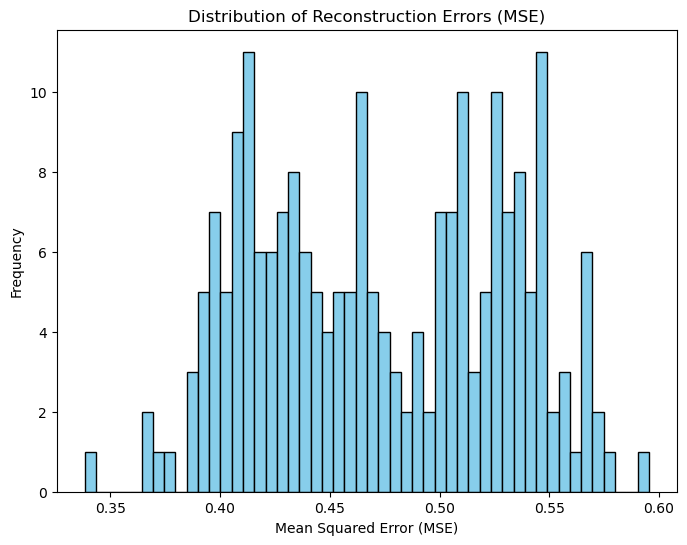

In [6]:
# Calculate the Mean Squared Error (MSE) for each sample
# This evaluates the reconstruction error between the original and predicted values
mse_values = [mean_squared_error(real[i], pred[i]) for i in range(len(real))]

# Create a histogram to visualize the distribution of reconstruction errors (MSE)
plt.figure(figsize=(8, 6))
plt.hist(mse_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reconstruction Errors (MSE)')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.show()

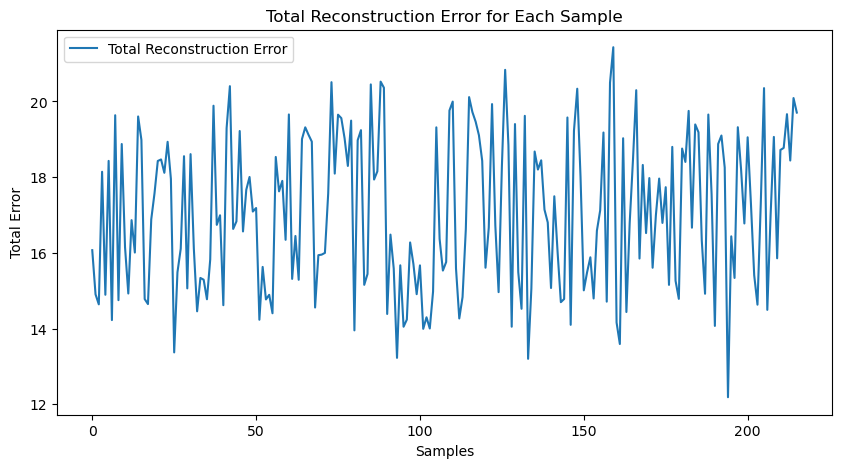

In [7]:
# Calculate the total reconstruction error for each sample (sum of errors across all features)
# This calculates how far the original data is from the reconstructed data for each sample
total_error = np.sum((real - pred) ** 2, axis=1)

# Create a plot to visualize the total reconstruction error for each sample
# Low error across many samples indicates a good reconstruction of data
# Spikes (high error) may indicate problematic samples or data anomalies
plt.figure(figsize=(10, 5))
plt.plot(total_error, label='Total Reconstruction Error')
plt.title('Total Reconstruction Error for Each Sample')
plt.xlabel('Samples')
plt.ylabel('Total Error')
plt.legend()
plt.show()